<a href="https://colab.research.google.com/github/parichayportfolio/FORE_BDA/blob/main/Fake_Authentic_User_Instagram_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake/Authentic User Instagram
https://www.kaggle.com/datasets/krpurba/fakeauthentic-user-instagram?select=user_fake_authentic_2class.csv

The dataset was collected using web scraping from third-party Instagram websites, to capture their metadata and up to 12 latest media posts from each user. The collection process was executed from September 1st, 2019, until September 20th, 2019. The dataset contains authentic users and fake users, which were filtered using human annotators.
The authentic users were taken from followers of 24 private university pages (8 Indonesian, 8 Malaysian, 8 Australian) on Instagram. To reduce the number of users, they are picked using proportional random sampling based on their source university. All private users were removed, which is a total of 31,335 out of 63,795 users (49.11%). The final number of public users used in this research was 32,460 users.

Var name | Feature name | Description

pos | Num posts | Number of total posts that the user has ever posted.

flg | Num following | Number of following

flr | Num followers | Number of followers

bl | Biography length | Length (number of characters) of the user's biography

pic | Picture availability | Value 0 if the user has no profile picture, or 1 if has

lin | Link availability | Value 0 if the user has no external URL, or 1 if has

cl | Average caption length | The average number of character of captions in media

cz | Caption zero | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length

ni | Non image percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel

erl | Engagement rate (Like) | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)

erc | Engagement rate (Comm.) | Similar to ER like, but it is for comments

lt | Location tag percentage | Percentage (0.0 to 1.0) of posts tagged with location

hc | Average hashtag count | Average number of hashtags used in a post

pr | Promotional keywords | Average use of promotional keywords in hashtag, i.e.
{regrann, contest, repost, giveaway, mention, share, give away, quiz}

fo | Followers keywords | Average use of followers hunter keywords in hashtag, i.e.
{follow, like, folback, follback, f4f}

cs | Cosine similarity | Average cosine similarity of between all pair of two posts a user has

pi | Post interval | Average interval between posts (in hours)


Output :
2-class User classes : r (real/authentic user), f (fake user / bought followers)

4-class User classes : r (authentic/real user), a (active fake user), i (inactive fake user), s (spammer fake user)

The 3 fake user classes (a, i, s) were judged by human annotators.

# Citations:

1.   K. R. Purba, D. Asirvatham and R. K. Murugesan, "Classification of instagram fake users using supervised machine learning algorithms," International Journal of Electrical and Computer Engineering (IJECE), vol. 10, no. 3, pp. 2763-2772, 2020.



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
#from tensorflow.keras.utils import to_categorical

# 1.1
import tensorflow as tf

# 1.2 Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#1.3 Making the shell interactive
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#1.4 Mount the Google drive
from google.colab import drive
drive.mount('/gdrive')

#1.5 For Plotting ML Model
from tensorflow.keras.utils import plot_model
from keras.utils.np_utils import to_categorical

Mounted at /gdrive


In [ ]:
#2.0 Read the file
path_2Clases = "/gdrive/MyDrive/BDA DLNLP/Project/user_fake_authentic_2class.csv"
path_4Clases = "/gdrive/MyDrive/BDA DLNLP/Project/user_fake_authentic_4class.csv"
Data_2Classes = pd.read_csv(path_2Clases)
Data_4Classes = pd.read_csv(path_4Clases)
Data_2Classes.head()
Data_4Classes.head()
Data_2Classes.shape
Data_4Classes.shape
Data_2Classes.dtypes
Data_4Classes.dtypes

,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi,class
0,44,48,325,33,1,0,12,0.0,0.0,0.00,0.00,0.000,0.0,0.0,0.000,0.111111,0.094985,f
1,10,66,321,150,1,0,213,0.0,1.0,14.39,1.97,0.000,1.5,0.0,0.000,0.206826,230.412857,f
2,33,970,308,101,1,1,436,0.0,1.0,10.10,0.30,0.000,2.5,0.0,0.056,0.572174,43.569939,f
3,70,86,360,14,1,0,0,1.0,0.0,0.78,0.06,0.000,0.0,0.0,0.000,1.000000,5.859799,f
4,3,21,285,73,1,0,93,0.0,0.0,14.29,0.00,0.667,0.0,0.0,0.000,0.300494,0.126019,f


,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi,class
0,69,541,440,293,1,0,223,0.000000,0.111,10.120000,0.50,0.944,0.556,0.0,0.0,0.107055,334.596802,r
1,9,783,803,76,1,0,101,0.000000,0.000,19.820000,1.99,0.889,0.222,0.0,0.0,0.007400,2137.979248,r
2,390,1200,925,103,1,0,723,0.000000,0.000,11.540000,0.76,1.000,2.389,0.0,0.0,0.221954,96.244957,r
3,138,1100,1000,40,1,0,24,0.166667,0.167,20.440001,1.61,0.833,0.111,0.0,0.0,0.025055,226.622437,r
4,1,228,487,84,1,0,30,0.000000,0.000,9.210000,1.75,1.000,0.000,0.0,0.0,0.000000,0.000000,r


(65326, 18)

(43307, 18)

pos        int64
flw        int64
flg        int64
bl         int64
pic        int64
lin        int64
cl         int64
cz       float64
ni       float64
erl      float64
erc      float64
lt       float64
hc       float64
pr       float64
fo       float64
cs       float64
pi       float64
class     object
dtype: object

pos        int64
flw        int64
flg        int64
bl         int64
pic        int64
lin        int64
cl         int64
cz       float64
ni       float64
erl      float64
erc      float64
lt       float64
hc       float64
pr       float64
fo       float64
cs       float64
pi       float64
class     object
dtype: object

In [ ]:
#3.0 Data Pre Processing
#Check for missing data
Data_2Classes.isnull().sum().any()
Data_4Classes.isnull().sum().any()
# Result shows no missing values.

#Encoding the Output Classes
Data_2Classes['class'].unique()
Data_4Classes['class'].unique()
LE_2Classes = LabelEncoder()
LE_4Classes = LabelEncoder()
LE_2Classes.fit(Data_2Classes['class']) # 0:Fake User || 1:Real User
LE_4Classes.fit(Data_4Classes['class']) # 0:Active Fake User || 1:Inactive Fake User || 2:Real User || 3:Spammer Fake User
LE_2Classes.classes_
LE_4Classes.classes_
Data_2Classes['class'] = LE_2Classes.transform(Data_2Classes['class'])
Data_4Classes['class'] = LE_4Classes.transform(Data_4Classes['class'])
Data_2Classes['class'][:2]
Data_4Classes['class'][:2]
Data_2Classes.dtypes
Data_4Classes.dtypes

#Taking out the output Variable from the Data Fram
y_2Classes = Data_2Classes.pop('class')
X_2Classes = Data_2Classes
X_2Classes[:2]
y_2Classes[:2]
y_4Classes = Data_4Classes.pop('class')
X_4Classes = Data_4Classes
X_4Classes[:2]
y_4Classes[:2]


#Splitting the data into Testing and Training Sets
X_2Classes_Train, X_2Classes_Test, y_2Classes_Train, y_2Classes_Test = train_test_split(X_2Classes, y_2Classes, stratify = y_2Classes, test_size=0.25)
X_4Classes_Train, X_4Classes_Test, y_4Classes_Train, y_4Classes_Test = train_test_split(X_4Classes, y_4Classes, stratify = y_4Classes, test_size=0.25)

X_2Classes_Train.shape
X_2Classes_Test.shape
y_2Classes_Train.shape
y_2Classes_Test.shape

X_4Classes_Train.shape
X_4Classes_Test.shape
y_4Classes_Train.shape
y_4Classes_Test.shape


#Transforming the data using Standard Scaler
ss_2Classes = StandardScaler()
ss_4Classes = StandardScaler()

ss_2Classes.fit(X_2Classes_Train)
ss_4Classes.fit(X_4Classes_Train)

X_2Classes_Train = ss_2Classes.transform(X_2Classes_Train)
X_2Classes_Test = ss_2Classes.transform(X_2Classes_Test)
X_2Classes_Train[:2]
X_2Classes_Test[:2]

X_4Classes_Train = ss_4Classes.transform(X_4Classes_Train)
X_4Classes_Test = ss_4Classes.transform(X_4Classes_Test)
X_4Classes_Train[:2]
X_4Classes_Test[:2]

False

False

array(['f', 'r'], dtype=object)

array(['r', 's', 'i', 'a'], dtype=object)

LabelEncoder()

LabelEncoder()

array(['f', 'r'], dtype=object)

array(['a', 'i', 'r', 's'], dtype=object)

0    0
1    0
Name: class, dtype: int64

0    2
1    2
Name: class, dtype: int64

pos        int64
flw        int64
flg        int64
bl         int64
pic        int64
lin        int64
cl         int64
cz       float64
ni       float64
erl      float64
erc      float64
lt       float64
hc       float64
pr       float64
fo       float64
cs       float64
pi       float64
class      int64
dtype: object

pos        int64
flw        int64
flg        int64
bl         int64
pic        int64
lin        int64
cl         int64
cz       float64
ni       float64
erl      float64
erc      float64
lt       float64
hc       float64
pr       float64
fo       float64
cs       float64
pi       float64
class      int64
dtype: object

,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi
0,44,48,325,33,1,0,12,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.111111,0.094985
1,10,66,321,150,1,0,213,0.0,1.0,14.39,1.97,0.0,1.5,0.0,0.0,0.206826,230.412857


0    0
1    0
Name: class, dtype: int64

,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi
0,69,541,440,293,1,0,223,0.0,0.111,10.12,0.50,0.944,0.556,0.0,0.0,0.107055,334.596802
1,9,783,803,76,1,0,101,0.0,0.000,19.82,1.99,0.889,0.222,0.0,0.0,0.007400,2137.979248


0    2
1    2
Name: class, dtype: int64

(48994, 17)

(16332, 17)

(48994,)

(16332,)

(32480, 17)

(10827, 17)

(32480,)

(10827,)

StandardScaler()

StandardScaler()

array([[-0.06379508, -0.03956843, -0.79352577, -0.77195462,  0.22590944,
        -0.62757861, -0.63140206, -0.73960488, -0.76576144, -0.14087934,
        -0.18123316, -0.69713362, -0.44578944, -0.15295344, -0.09784519,
         2.00893127, -0.52790959],
       [ 0.33166822, -0.0273348 , -0.83137543,  0.43296154,  0.22590944,
         1.59342589, -0.0157552 , -0.73960488, -0.32866339, -0.12561408,
        -0.14489058, -0.69713362, -0.39645915, -0.15295344,  0.00432524,
        -0.23686655, -0.487738  ]])

array([[-0.24481702, -0.05042018, -0.89008102, -0.89714072,  0.22590944,
        -0.62757861, -0.63140206, -0.73960488, -0.76576144, -0.14087934,
        -0.18123316, -0.69713362, -0.44578944, -0.15295344, -0.09784519,
         2.00893127, -0.52790959],
       [-0.21835997,  0.01054474,  1.77484387,  1.74741554,  0.22590944,
         1.59342589, -0.43698726,  1.40539531, -0.5452435 , -0.07864405,
        -0.1733326 ,  2.44848387,  0.14176952, -0.15295344, -0.09784519,
         0.6190023 ,  0.42901817]])

array([[-1.80030134e-01, -4.96463551e-02,  1.23797644e+00,
        -7.65602891e-01,  2.68295683e-01, -4.05781511e-01,
        -5.70423519e-01,  1.99041794e+00, -7.11219930e-01,
        -9.87618002e-04, -4.04237154e-02, -6.03358381e-01,
        -3.70670152e-01, -1.57111093e-01, -1.03439806e-01,
         1.73335823e+00,  8.45096134e-01],
       [ 1.39269921e-01,  3.10780679e-02, -6.62067322e-01,
         9.27297374e-01,  2.68295683e-01, -4.05781511e-01,
        -1.33529268e-02, -8.14108037e-01,  1.48021644e-01,
        -1.42198122e-02, -8.55339326e-02,  1.37727849e+00,
        -1.87614513e-01,  3.90514269e-02, -1.03439806e-01,
        -7.41204830e-01,  1.27363331e-01]])

array([[-0.18548825, -0.06046263, -0.78738405, -0.76560289,  0.26829568,
        -0.40578151, -0.5420979 ,  1.00058574, -0.71121993,  0.08218616,
         0.05510381, -0.60335838, -0.37067015, -0.15711109, -0.10343981,
         0.16001091, -0.0983532 ],
       [-0.20868527, -0.04574931,  0.91756434, -0.76560289,  0.26829568,
        -0.40578151, -0.57042352, -0.81410804, -0.71121993, -0.12715077,
        -0.15187249, -0.60335838, -0.37067015, -0.15711109, -0.10343981,
         1.73335823, -0.51000095]])

17

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4608      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 32)                8224      
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 538,466
Trainable params: 538,466
Non-trai

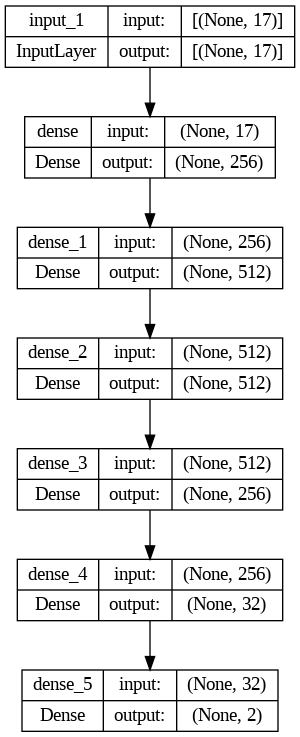

17

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               4608      
                                                                 
 dense_7 (Dense)             (None, 512)               131584    
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 32)                8224      
                                                                 
 dense_11 (Dense)            (None, 4)                 132       
                                                                 
Total params: 538,532
Trainable params: 538,532
Non-tr

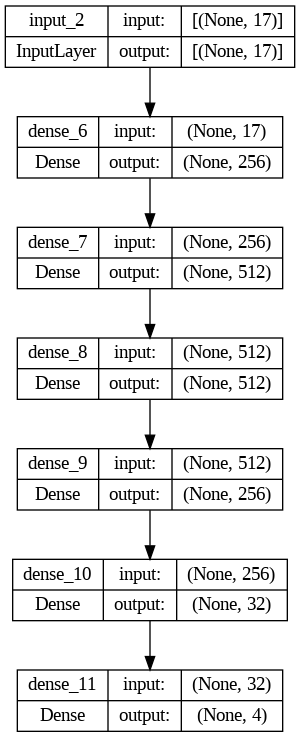

In [ ]:
#4.0 Preparing the ML Model
model_2Classes = tf.keras.Sequential()
X_2Classes_Train.shape[1]
model_2Classes.add( tf.keras.layers.Input(shape = (X_2Classes_Train.shape[1]) ))
model_2Classes.add(tf.keras.layers.Dense(256, activation = 'relu'))
model_2Classes.add(tf.keras.layers.Dense(512, activation = 'relu'))
model_2Classes.add(tf.keras.layers.Dense(512, activation = 'relu'))
model_2Classes.add(tf.keras.layers.Dense(256, activation = 'relu'))
model_2Classes.add(tf.keras.layers.Dense(32, activation = 'relu'))
model_2Classes.add(tf.keras.layers.Dense(2, activation = 'softmax'))
model_2Classes.summary()
plot_model(model_2Classes, show_shapes=True)

model_4Classes = tf.keras.Sequential()
X_4Classes_Train.shape[1]
model_4Classes.add( tf.keras.layers.Input(shape = (X_4Classes_Train.shape[1]) ))
model_4Classes.add(tf.keras.layers.Dense(256, activation = 'relu'))
model_4Classes.add(tf.keras.layers.Dense(512, activation = 'relu'))
model_4Classes.add(tf.keras.layers.Dense(512, activation = 'relu'))
model_4Classes.add(tf.keras.layers.Dense(256, activation = 'relu'))
model_4Classes.add(tf.keras.layers.Dense(32, activation = 'relu'))
model_4Classes.add(tf.keras.layers.Dense(4, activation = 'softmax'))
model_4Classes.summary()
plot_model(model_4Classes, show_shapes=True)


#4.1 Compile the Model
model_2Classes.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['acc'])
model_4Classes.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['acc'])


In [ ]:
#5.0 Training the model
y_2Classes_Train_Categorical = to_categorical(y_2Classes_Train,2)
y_2Classes_Test_Categorical = to_categorical(y_2Classes_Test,2)
y_2Classes_Train_Categorical.shape
y_2Classes_Test_Categorical.shape

y_4Classes_Train_Categorical = to_categorical(y_4Classes_Train,4)
y_4Classes_Test_Categorical = to_categorical(y_4Classes_Test,4)
y_4Classes_Train_Categorical.shape
y_4Classes_Test_Categorical.shape

tf.config.run_functions_eagerly(True)
model_2Classes.fit(X_2Classes_Train, y_2Classes_Train_Categorical, epochs=50)
model_4Classes.fit(X_4Classes_Train, y_4Classes_Train_Categorical, epochs=50)

(48994, 2)

(16332, 2)

(32480, 4)

(10827, 4)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1532/1532 [==============================] - 112s 73ms/step - loss: 0.3581 - acc: 0.8444
Epoch 2/50
1532/1532 [==============================] - 110s 72ms/step - loss: 0.3068 - acc: 0.8652
Epoch 3/50
1532/1532 [==============================] - 121s 79ms/step - loss: 0.2968 - acc: 0.8687
Epoch 4/50
1532/1532 [==============================] - 113s 74ms/step - loss: 0.2897 - acc: 0.8723
Epoch 5/50
1532/1532 [==============================] - 110s 72ms/step - loss: 0.2808 - acc: 0.8757
Epoch 6/50
1532/1532 [==============================] - 111s 72ms/step - loss: 0.2725 - acc: 0.8787
Epoch 7/50
1532/1532 [==============================] - 111s 72ms/step - loss: 0.2660 - acc: 0.8798
Epoch 8/50
1532/1532 [==============================] - 109s 71ms/step - loss: 0.2608 - acc: 0.8833
Epoch 9/50
1532/1532 [==============================] - 110s 72ms/step - loss: 0.2577 - acc: 0.8830
Epoch 10/50
1532/1532 [==============================] - 112s 73ms/step - loss: 0.2523 - acc: 0.8863
Epoch 11/5

Epoch 1/50
1015/1015 [==============================] - 73s 72ms/step - loss: 0.6901 - acc: 0.7212
Epoch 2/50
1015/1015 [==============================] - 74s 72ms/step - loss: 0.5563 - acc: 0.7683
Epoch 3/50
1015/1015 [==============================] - 76s 74ms/step - loss: 0.5127 - acc: 0.7867
Epoch 4/50
1015/1015 [==============================] - 77s 76ms/step - loss: 0.4874 - acc: 0.7958
Epoch 5/50
1015/1015 [==============================] - 73s 72ms/step - loss: 0.4646 - acc: 0.8044
Epoch 6/50
1015/1015 [==============================] - 74s 73ms/step - loss: 0.4412 - acc: 0.8111
Epoch 7/50
1015/1015 [==============================] - 74s 73ms/step - loss: 0.4293 - acc: 0.8175
Epoch 8/50
1015/1015 [==============================] - 78s 77ms/step - loss: 0.4117 - acc: 0.8215
Epoch 9/50
1015/1015 [==============================] - 73s 72ms/step - loss: 0.3982 - acc: 0.8268
Epoch 10/50
1015/1015 [==============================] - 74s 73ms/step - loss: 0.3866 - acc: 0.8324
Epoch 11/

In [ ]:
#Predicting
y_2Classes_predict = model_2Classes.predict(X_2Classes_Test)
y_4Classes_predict = model_4Classes.predict(X_4Classes_Test)

y_2Classes_Predict_Categorical = [np.argmax(y, axis=None, out=None) for y in y_2Classes_predict]
y_4Classes_Predict_Categorical = [np.argmax(y, axis=None, out=None) for y in y_4Classes_predict]

y_2Classes_Predict_Categorical[:5]
y_2Classes_Test[:5]

y_4Classes_Predict_Categorical[:5]
y_4Classes_Test[:5]

339/339 [==============================] - 4s 12ms/step


[0, 1, 0, 1, 0]

28082    0
8347     0
23084    0
54379    1
1494     0
Name: class, dtype: int64

[2, 1, 1, 0, 0]

4160     2
38349    1
35607    1
16223    0
31588    0
Name: class, dtype: int64